# (Week3) 🌇 エイムズ市住宅価格予測

```aim```
+ データ分析の基本的な流れを知る
+ データ分析ライブラリのPandasに慣れる
+ KaggleのNotebooksを利用する

```Cf.```

    アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。
    住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。
    エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

+ [Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)
+ [エイムズ (アイオワ州)](https://ja.wikipedia.org/wiki/%E3%82%A8%E3%82%A4%E3%83%A0%E3%82%BA_(%E3%82%A2%E3%82%A4%E3%82%AA%E3%83%AF%E5%B7%9E))

    Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。
    良いEDAをたくさん見て、ノウハウを吸収していきましょう。
    今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

《参考Notebooks》
+ [Comprehensive data exploration with Python | Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)（まずはここから）
+ [House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)
+ [A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)

---
## 【問題1】データセットの取得

データセットはKaggleからダウンロードします。
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

---
## 【問題2】データセット自体の調査
    KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

+ 目的変数：（課題で予測する値）
        SalePrice(住宅価格)
+ 説明変数：（予測に用いる値：特徴量）
        80個

説明変数を用いて、目的変数を予測するデータセットとなっている。

```Cf.```
+ [kaggle House Pricesをやってみる(概要とデータの確認) - 何かをやりたい何かになりたい](https://trueman-developer.blogspot.com/2019/08/kaggle-house-prices.html)
+ [kaggle House Pricesをやってみる(データの可視化) - 何かをやりたい何かになりたい](https://trueman-developer.blogspot.com/2019/08/kaggle-house-prices_8.html)
+ [pandasで行数、列数、全要素数（サイズ）を取得 - note.nkmk.me](https://note.nkmk.me/python-pandas-len-shape-size/)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
print('columns are {}.'.format(len(train.columns))) #カラム個数確認
print(train.columns) #カラム変数確認

columns are 81.
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

---
## 【問題3】データの確認
    データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。
        - 各特徴量がどういったものかを見る。（数値データか文字データなど）
        - 今回の目的変数はどの列か確認する。
        - 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [6]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

各カラムの要素が float64(11項目), int64(26項目), object(43項目)の計８０項目。

```
# 今回の目的変数はどの列か確認する
```
今回の目的変数は、`test.csv`と`train.csv`の説明変数との比較から最終列の`SalePrice`

In [7]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


---
## 【問題4】欠損値への対応
    欠損値に関して以下のことを行い、レポートしてください。
    - 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。
このライブラリにより欠損値の有無が可視化できます。
インストールや使い方に関しては以下のページをご覧ください。
[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

    - 欠損値が何パーセント含まれるかを確認する。
    - 5つ以上欠損値がある特徴量（列）は削除する。
    - 欠損値があるサンプル（行）は削除する。
    
```Cf.```
+ [【Python】Missingno を使って欠損値を可視化 - Qiita](https://qiita.com/shuva/items/4233b60a270767994ddc)
+ [%matplotlib inlineは不要では？ - teratail](https://teratail.com/questions/233593)
+ [【python】欠損値（NaN）を含む行列を抽出・削除・変換する方法 - Qiita](https://qiita.com/yuta-38/items/122e607770b88d445d2e#1-1-isnaall)
+ [pandas.DataFrameの行・列を指定して削除するdrop - note.nkmk.me](https://note.nkmk.me/python-pandas-drop/)
+ [pandas.DataFrame, SeriesとPython標準のリストを相互に変換 - note.nkmk.me](https://note.nkmk.me/python-pandas-list/)
+ [NumPy配列ndarrayとPython標準のリストを相互に変換 - note.nkmk.me](https://note.nkmk.me/python-numpy-list/)

In [8]:
# 各特徴量の欠損値の有無を確認する。
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [9]:
#Visualization
import missingno as msno
%matplotlib inline

<AxesSubplot:>

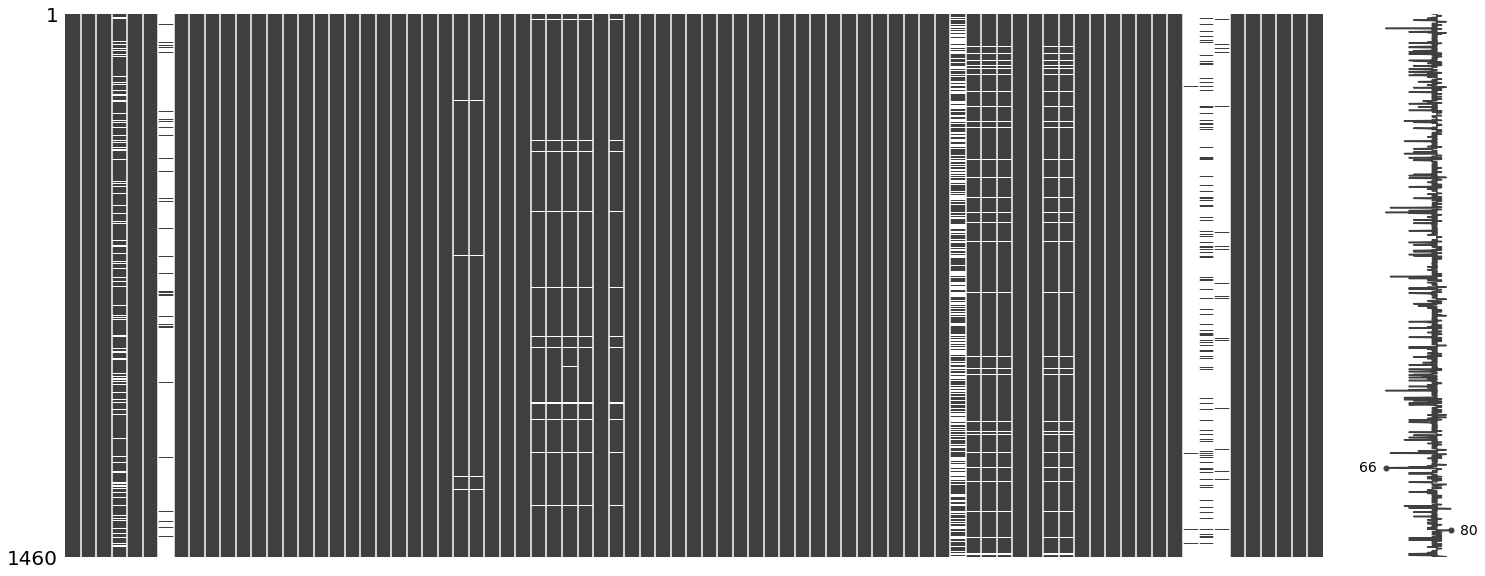

In [10]:
msno.matrix(train)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

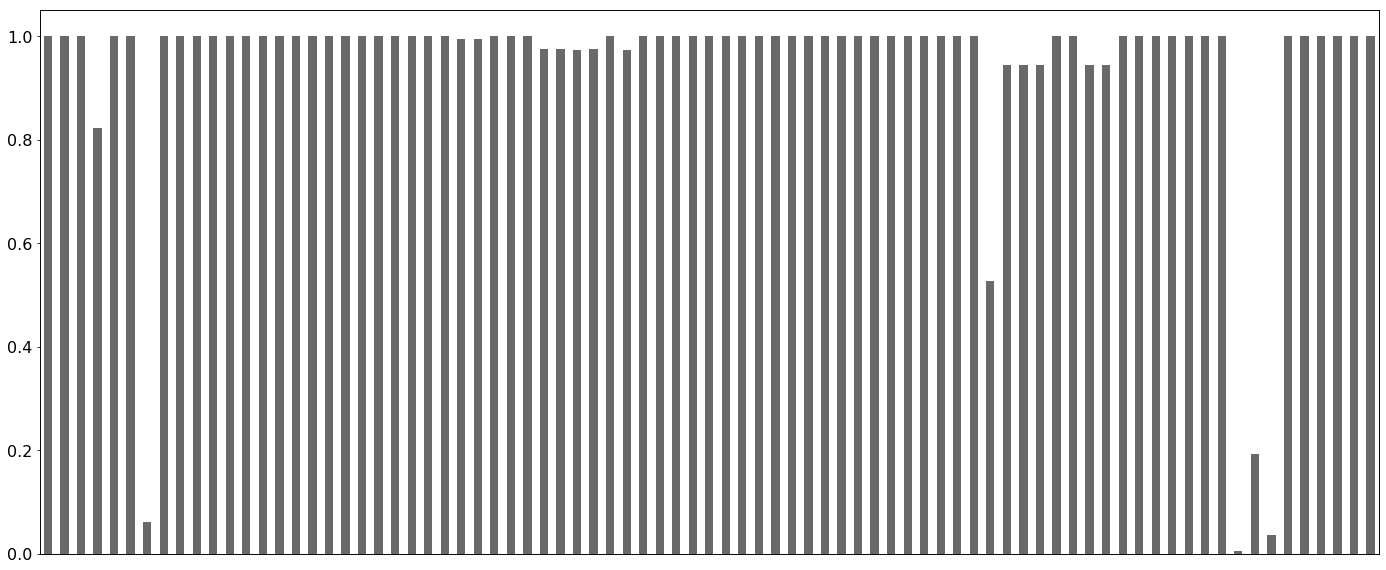

In [11]:
msno.bar(train)

<AxesSubplot:>

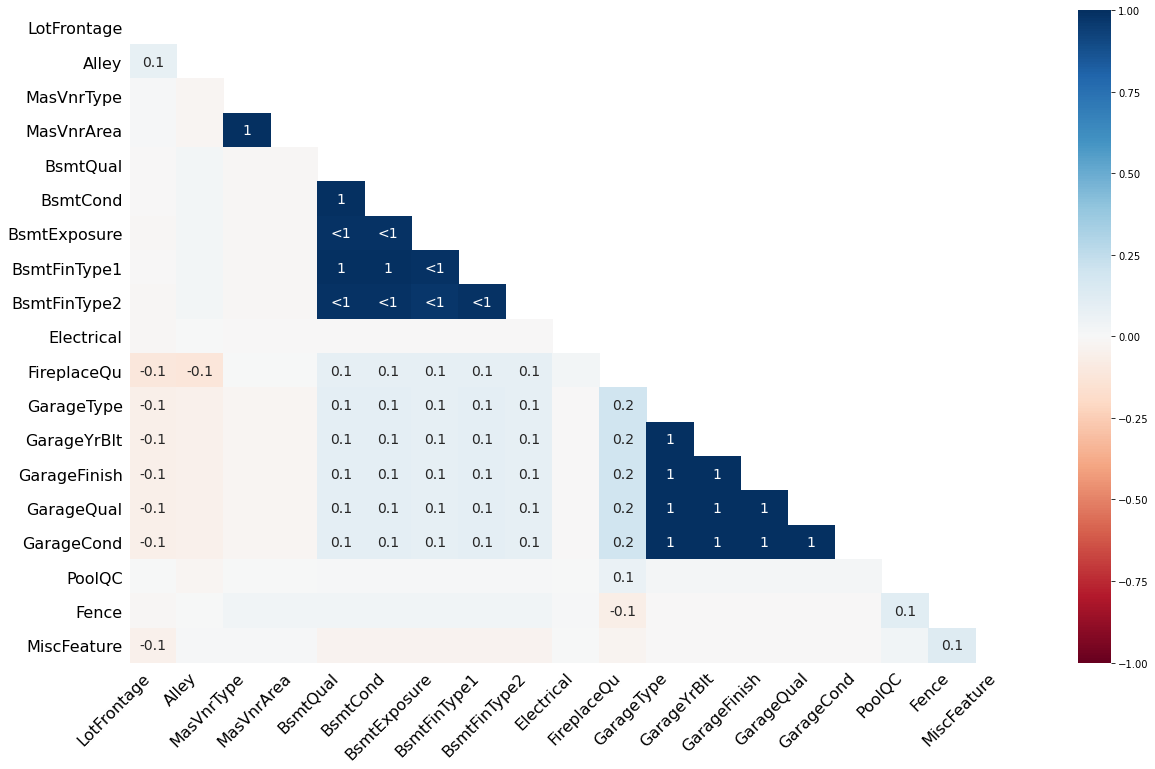

In [12]:
msno.heatmap(train)

<AxesSubplot:>

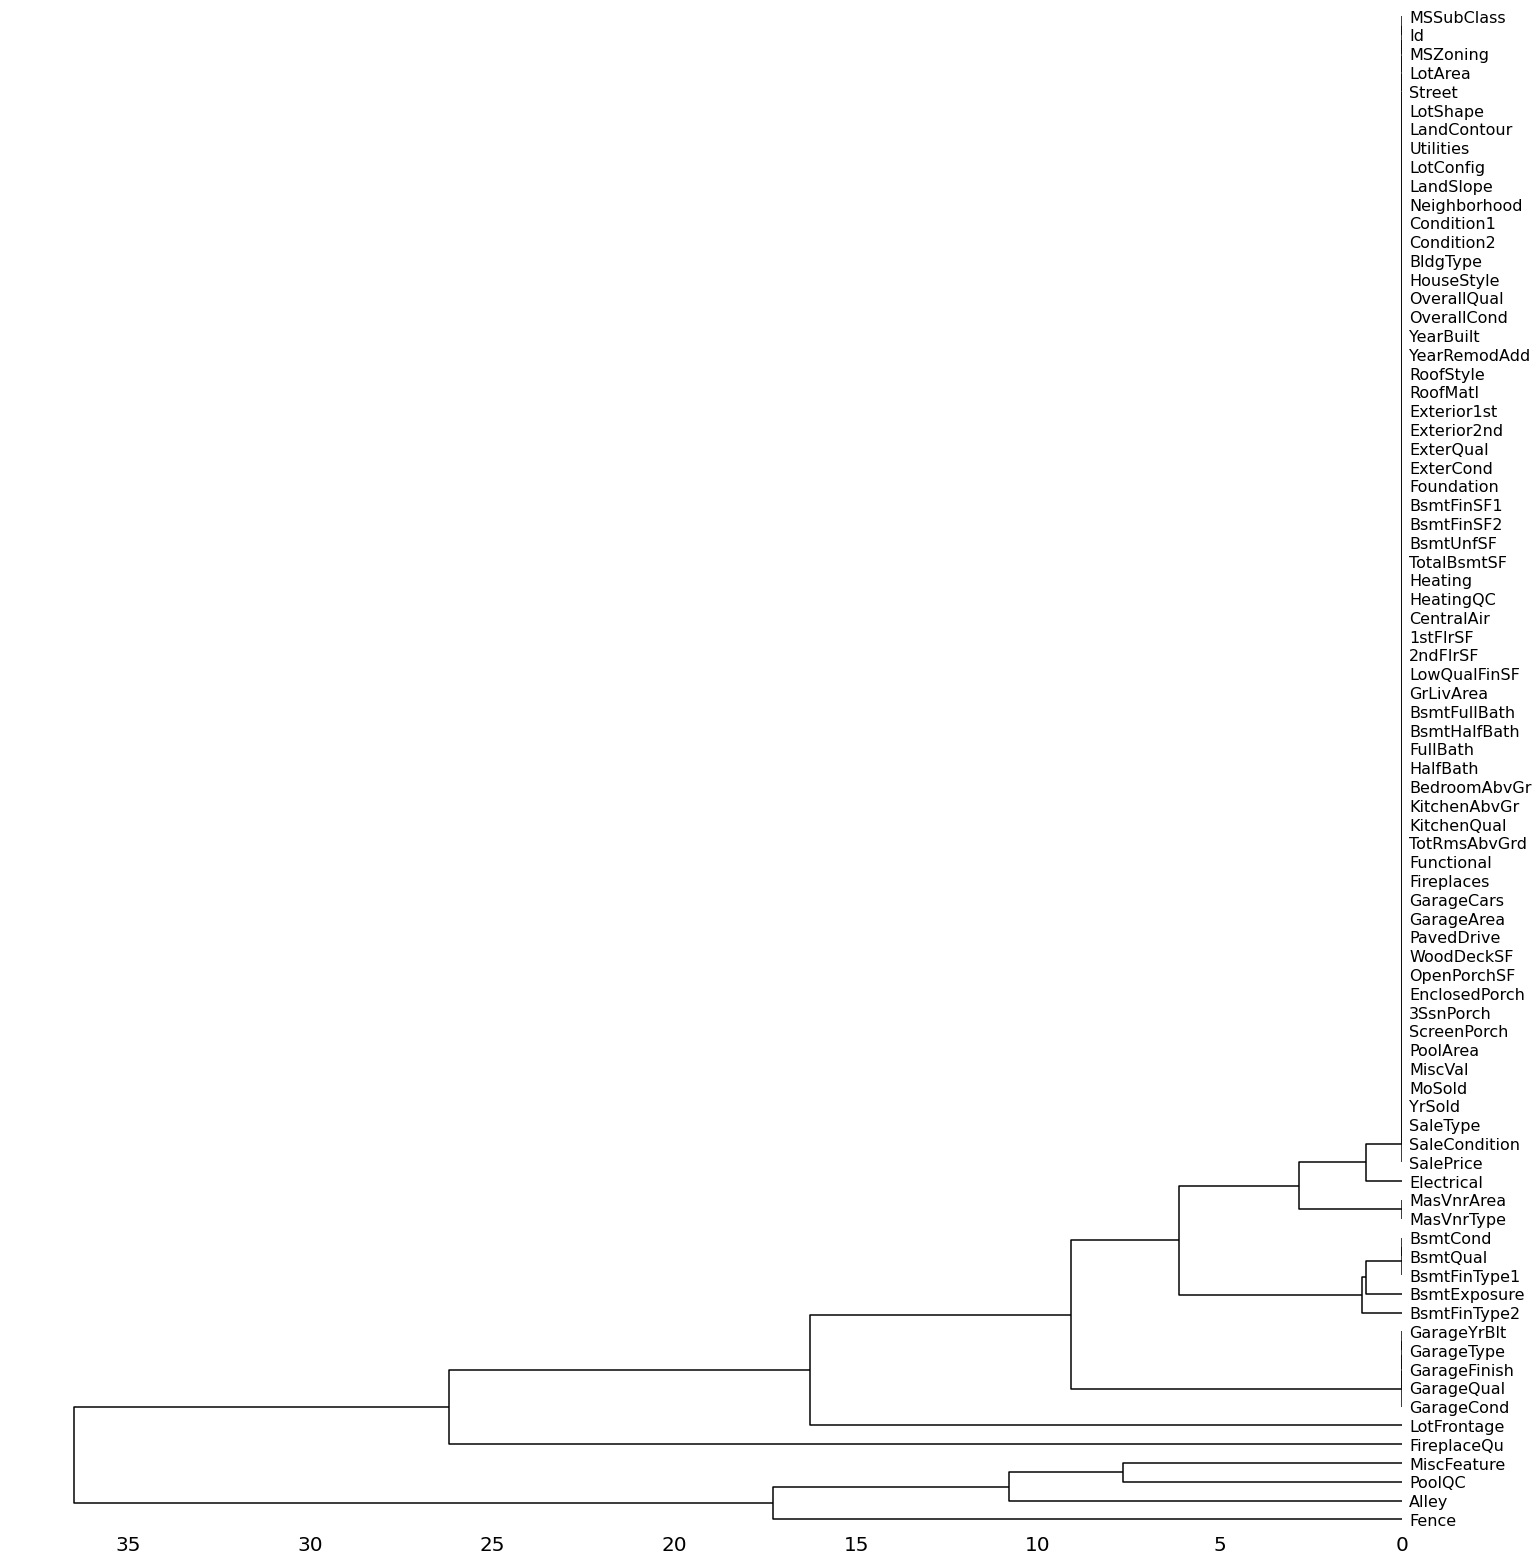

In [13]:
msno.dendrogram(train)

In [14]:
train.shape

(1460, 81)

In [15]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column type']
dtype_df

,Count,Column type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
...,...,...
76,MoSold,int64
77,YrSold,int64
78,SaleType,object
79,SaleCondition,object


In [16]:
# 欠損値が何パーセント含まれるかを確認する。

# Find out null values
missing_df = train.isnull().sum(axis=0).reset_index() #欠損抽出
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = (missing_df['missing_count'] / train.shape[0]) * 100 #割合列を算出追加 
missing_df = missing_df.loc[missing_df['missing_count'] > 0].sort_values(by=['missing_ratio'],ascending=False)
missing_df

,column_name,missing_count,missing_ratio
72,PoolQC,1453,99.520548
74,MiscFeature,1406,96.301370
6,Alley,1369,93.767123
73,Fence,1179,80.753425
57,FireplaceQu,690,47.260274
3,LotFrontage,259,17.739726
58,GarageType,81,5.547945
59,GarageYrBlt,81,5.547945
60,GarageFinish,81,5.547945
63,GarageQual,81,5.547945


In [46]:
# 5つ以上欠損値がある特徴量（列）は削除する。
import numpy as np

drop_list = []
# 該当行を抽出＋カラム名をリスト変換
drop_list.append(missing_df.loc[missing_df['missing_count'] > 5 ].loc[:, ['column_name']].values.tolist())
drop_list = np.array(drop_list).squeeze() # 次元削減: （1,18,1）→(18,)
df = train.drop(drop_list, axis=1)
len(df.columns)

63

In [52]:
# 欠損値があるサンプル（行）は削除する。
df.isnull().sum(axis=1).sum()

1

In [55]:
df = df.dropna(how='any', axis=0) # 欠損値が１つでもある行を削除
df.isnull().sum(axis=1).sum()

0

（別解）

In [74]:
df2 = train

print('列の欠損数：', df2.isnull().sum().sum())
print('行の欠損数：', df2.isnull().sum(axis=1).sum())


df2 = df2.dropna(how='any', axis=1)

print('列の欠損数：', df2.isnull().sum().sum())
print('行の欠損数：', df2.isnull().sum(axis=1).sum())

列の欠損数： 6965
行の欠損数： 6965
列の欠損数： 0
行の欠損数： 0


---
## 【問題5】用語の調査
    以下の２つの単語を知る必要があります。これらを調査してまとめてください。
        - 尖度
        - 歪度
        
```Cf,```
+ [3-5. 歪度と尖度 - 統計WEB](https://bellcurve.jp/statistics/course/17950.html)

**尖度（kurtosis）**
[尖度 - Wikipedia](https://ja.wikipedia.org/wiki/%E5%B0%96%E5%BA%A6)

**歪度（skewness）**
[歪度 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%AD%AA%E5%BA%A6)

---
## 【問題6】分布の確認
        - seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
        - 目的変数に対して対数変換を行う。
        - 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

    対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

```Cf.```
+ [seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)
+ [回帰分析の説明変数や目的変数は正規分布していなくてもよいか？ - 統計ER](https://toukeier.hatenablog.com/entry/2019/09/08/224346)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

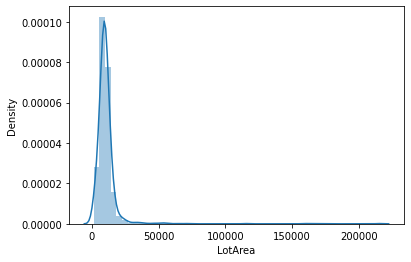

In [81]:
import seaborn as sns

sns.distplot(df.LotArea)

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

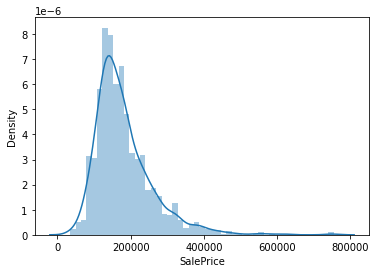

In [84]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(df['SalePrice'])

In [92]:
skew = round(df['SalePrice'].skew(),2)
kurt = round(df['SalePrice'].kurt(),2)
print('歪度 ： {} \n尖度 : {} '.format(skew, kurt))

df['SalePrice'].describe()

歪度 ： 1.88 
尖度 : 6.53 


count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/t/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

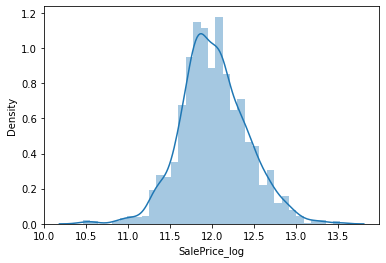

In [94]:
# 目的変数に対して対数変換を行う。
df['SalePrice_log']= np.log(df['SalePrice'])
sns.distplot(df['SalePrice_log'])

In [96]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
skew = round(df['SalePrice_log'].skew(),2)
kurt = round(df['SalePrice_log'].kurt(),2)
print('歪度 ： {} \n尖度 : {} '.format(skew, kurt))

df['SalePrice'].describe()

歪度 ： 0.12 
尖度 : 0.81 


count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

---
## 【問題7】相関係数の確認
    特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。
    
        - 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
        - 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
        - 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
        - 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

    《補足》
    重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。
    このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

```Cf.```
+ [pandasでn個の最大値・最小値を取得（nlargest, nsmallest） - note.nkmk.me](https://note.nkmk.me/python-pandas-nlargest-nsmallest/)
+ [numpy.corrcoef - NumPy1.19](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

<AxesSubplot:>

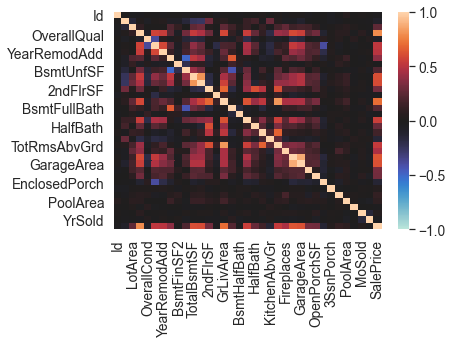

In [135]:
corr = df2.corr()
sns.heatmap(corr, vmin=-1.0,vmax=1.0, center=0)

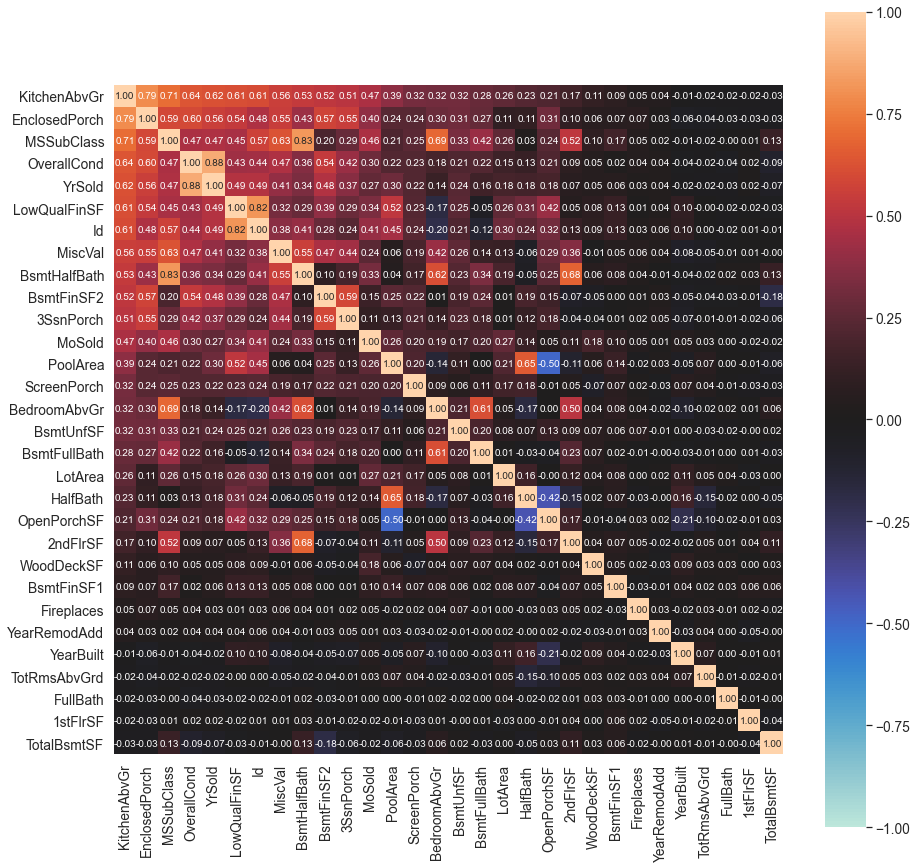

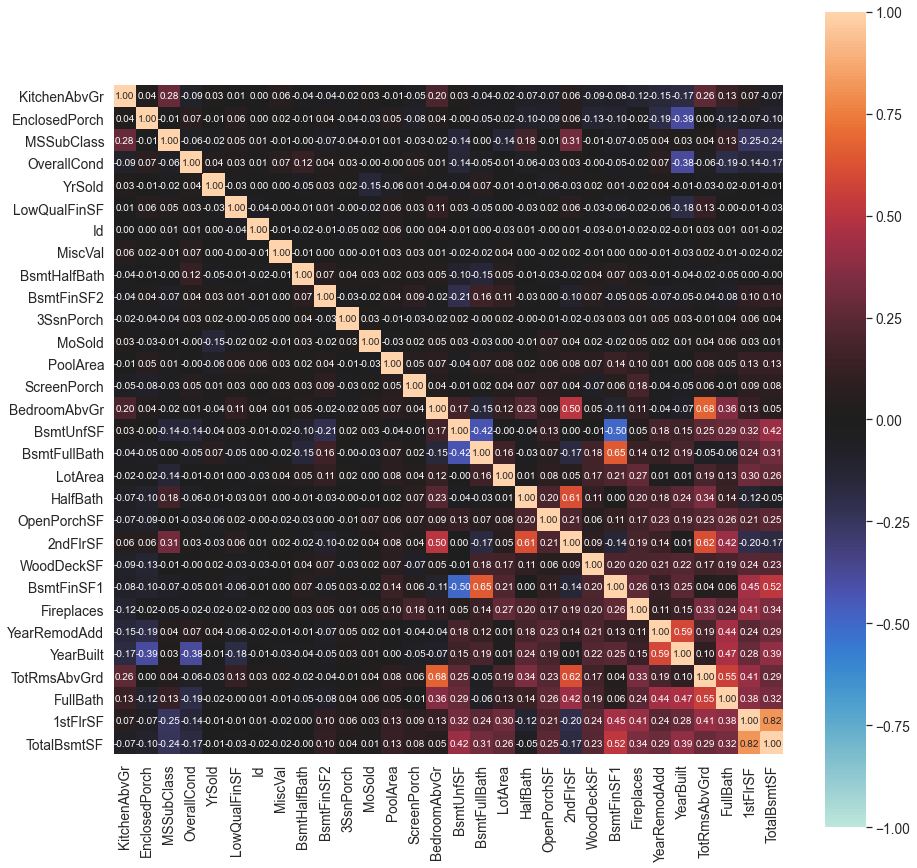

In [133]:
import matplotlib.pyplot as plt

corr = df2.corr()

# 関連が大きい順30項目抜粋（任意）
cols_first = corr.nlargest(30, 'SalePrice')['SalePrice'].index
cc1 = np.corrcoef(df2[cols_first].values.T)

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.25)
sns.heatmap(cc1, vmin=-1.0,vmax=1.0, center=0, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# 関連が小さい順30項目抜粋（任意）
cols_latter = corr.nsmallest(30, 'SalePrice')['SalePrice'].index
cc2 = np.corrcoef(df2[cols_latter].values.T)

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.25)
sns.heatmap(cc2, vmin=-1.0,vmax=1.0, center=0, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

**0.88**
+ OverallCond 全体的なコンディション評価
+ YrSold 販売年

**0.83**
+ BsmtHalfBath 地下ハーフバスルーム
+ MSSubClass 建物クラス

**0.82**
+ 1stFlrSF 1階平方フィート
+ TotalBsmtSF 地下室の総平方フィート

**0.79**
+ EnclosedPorch 囲まれたポーチの面積（平方フィート）
+ KitchenAbvGr キッチンの質

**0.71**
+ MSSubClass 建物クラス
+ KitchenAdvGr キッチンの質

**0.69**
+ MSSubClass 建物クラス
+ BedroomAbvGr ベッドルームの質

**0.68**
+ 2ndFlrSF 2階平方フィート
+ BsmtHalfBath 地下ハーフバスルーム

<AxesSubplot:>

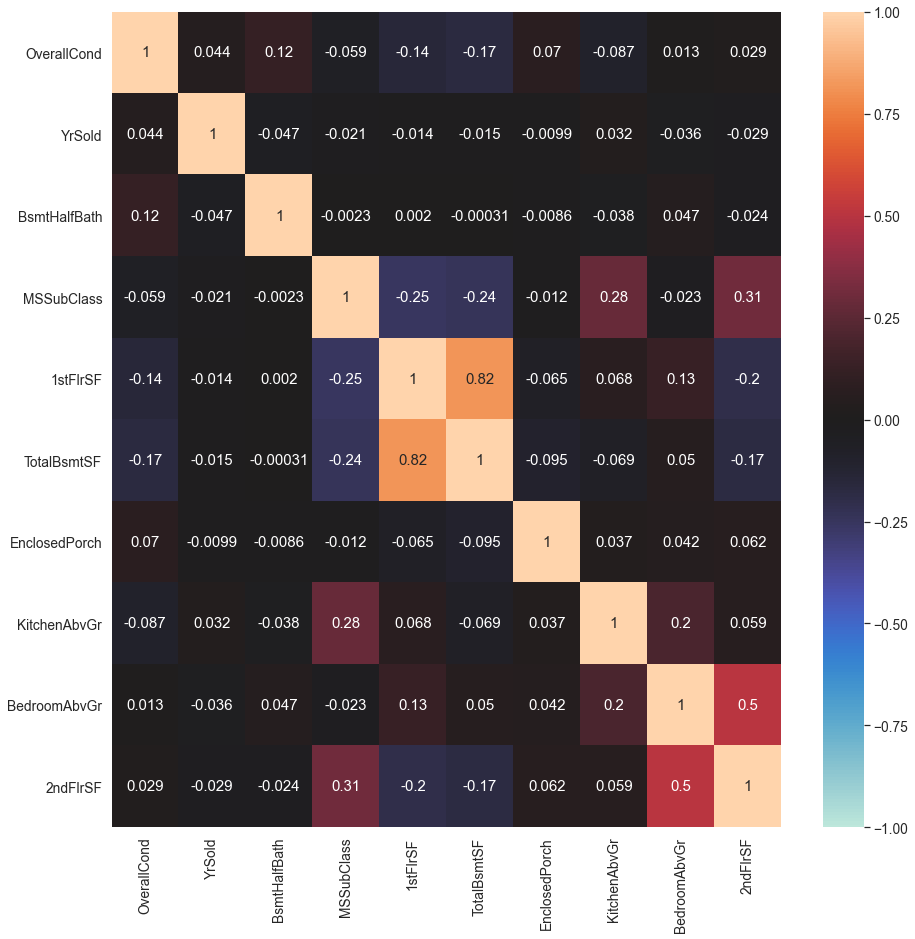

In [144]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る
var_10_list = [
    'OverallCond',
    'YrSold',
    'BsmtHalfBath',
    'MSSubClass',
    '1stFlrSF',
    'TotalBsmtSF',
    'EnclosedPorch',
    'KitchenAbvGr',
    'BedroomAbvGr',
    '2ndFlrSF'
]

var_10 = df2[var_10_list]
corr_var = var_10.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_var, vmax=1, vmin=-1, center=0, annot=True)

選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

0.82
+ 1stFlrSF 1階平方フィート
+ TotalBsmtSF 地下室の総平方フィート

0.5
+ BedroomAbvGr ベッドルームの質
+ 2ndFlrSF 2階平方フィート

0.31
+ MSSubClass 建物クラス
+ BedroomAbvGr ベッドルームの質